In [1]:
import cv2 
import matplotlib.pyplot as plt 
import numpy as np 
from keras.models import load_model
import utils # utils is a python file which contains the functions that we will be using

/home/asranand7/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
mser = cv2.MSER_create() # create the MSER operator

In [3]:
def get_textboxes(filename):
    '''
    Input : Name of any image
    Output: Returns the rectangular boxes around the texts in the imageh
    The boxes contaion the co-ordinates [x1,y1,x2 ,y2] and not[x,y,width, height]
    width = x2-x1
    height= y2-y1
    '''
    img = cv2.imread(filename)
    img = utils.image_denoising(img)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray = utils.adaptive_thresholding(gray)
    regions,boxes = mser.detectRegions(gray)
    boxes = np.array(boxes)
    
    #Delete the boxes with aspect ratio greater than 2 or less than 1/2 
    # as the characters don't have such aspect ratio 
    
    '''idxs = []
    for i in range(len(boxes)):
        aspectratio = boxes[i][2]/boxes[i][3]
        if (aspectratio > 2) or (aspectratio < 0.5):
            idxs.append(i)
    boxes = np.delete(boxes,idxs,axis = 0) '''
    
    character_boxes = []  # find all the character containing boxes 
    for i in range(0,len(boxes)):
        x,y,w,h = boxes[i][0],boxes[i][1],boxes[i][2],boxes[i][3]
        cropped = gray [y: y+h, x:x+w]
        predict = utils.is_text(cropped)
        if predict > 0.95:
            character_boxes.append(boxes[i])
    character_boxes = np.array(character_boxes)
    
    #Now extend the boxes
    extendedboxes = utils.extend_boxes(character_boxes,img.shape)
    #Now merge the character boxes to form the text boxes
    text_boxes = utils.merge_boxes(extendedboxes)
    return text_boxes
            
            
    
    

In [4]:
def show_textboxes(textboxes,image):
    for i in range(len(textboxes)):
        x,y,w,h = textboxes[i][0],textboxes[i][1],textboxes[i][2],textboxes[i][3]
        x = int(x)
        y = int(y)
        x1 = int(w)
        y1 = int(h)
        cv2.rectangle(image,(x,y),(x1,y1),(255,0,0),2)
    plt.imshow(image)
    plt.show()
    

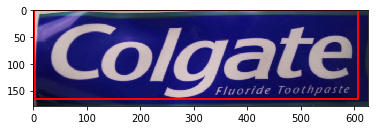

0.693112850189209


In [19]:
import time
tick = time.time()
filename = 'img_6.jpg'
textboxes = get_textboxes(filename)
image = cv2.imread(filename)
show_textboxes(textboxes,image)
tock = time.time()
print(tock - tick)